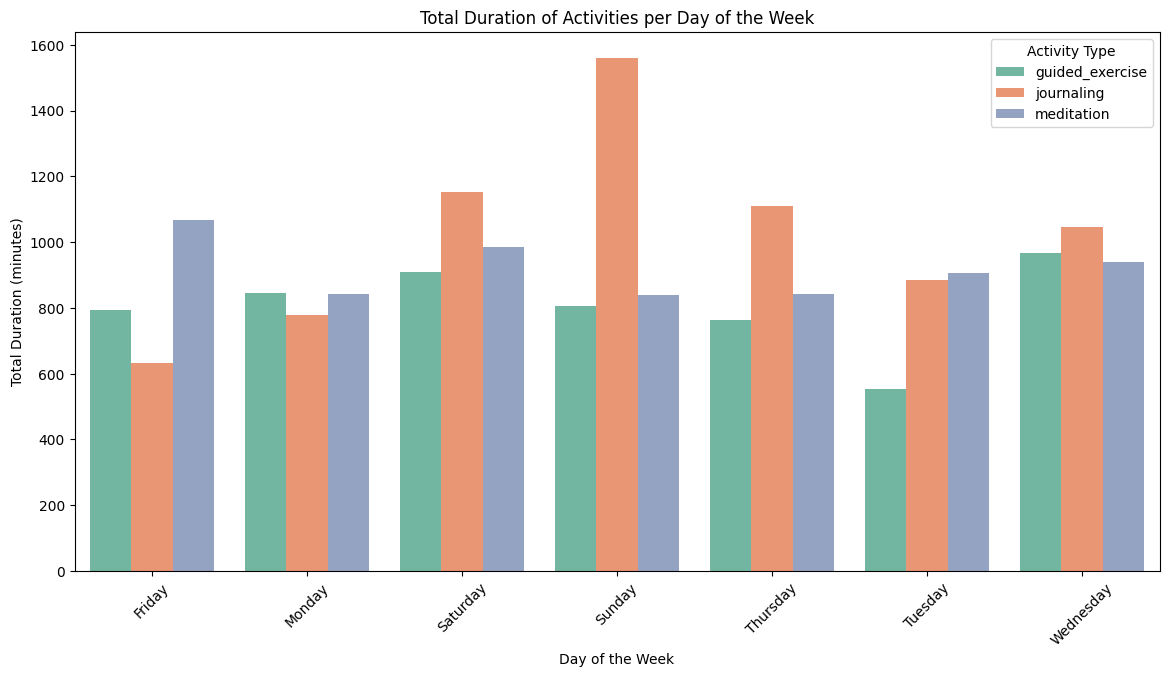

Weekly Duration of Each Activity Type per User:
   user_id  week    activity_type  duration_minutes
0        1    13       journaling                43
1        1    13       meditation                45
2        1    14  guided_exercise               105
3        1    14       journaling                96
4        1    14       meditation               145

Day of the Week with Highest Total Duration for Each Activity Type:
      activity_type day_of_week  duration_minutes
6   guided_exercise   Wednesday               967
10       journaling      Sunday              1561
14       meditation      Friday              1068

Statistical Test Results for Activity Differences Between Days of the Week:
                    day1      day2 statistic   p-value
guided_exercise  Tuesday  Saturday  -1.55321  0.136872
journaling        Friday    Sunday -2.669545  0.015151
meditation        Monday    Friday -1.011335  0.324563


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
file_path = r'C:\Users\yashw\OneDrive\Desktop\user_activity.csv'
data = pd.read_csv(file_path)

# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'])

# Add a column for the week
data['week'] = data['date'].dt.isocalendar().week

# Calculate the total weekly duration of each activity type per user
weekly_duration = data.groupby(['user_id', 'week', 'activity_type'])['duration_minutes'].sum().reset_index()

# Add a column for the day of the week
data['day_of_week'] = data['date'].dt.day_name()

# Calculate the total duration per day of the week for each activity type
daily_duration = data.groupby(['activity_type', 'day_of_week'])['duration_minutes'].sum().reset_index()

# Identify the day of the week with the highest total duration for each activity type
max_duration_per_day = daily_duration.loc[daily_duration.groupby('activity_type')['duration_minutes'].idxmax()]

# Plot total duration per day of the week for each activity type
plt.figure(figsize=(14, 7))
sns.barplot(x='day_of_week', y='duration_minutes', hue='activity_type', data=daily_duration, palette='Set2')
plt.title('Total Duration of Activities per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Duration (minutes)')
plt.legend(title='Activity Type')
plt.xticks(rotation=45)
plt.show()

# Pivot the data to analyze the duration per day of the week per user and activity type
pivot_data = data.pivot_table(index=['user_id', 'activity_type'], columns='day_of_week', values='duration_minutes', aggfunc='sum', fill_value=0)

# Perform statistical tests to identify differences between days of the week
stat_results = {}
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for activity in pivot_data.index.get_level_values('activity_type').unique():
    activity_data = pivot_data.loc[pivot_data.index.get_level_values('activity_type') == activity]
    day_diffs = []
    for i in range(len(days_of_week)):
        for j in range(i+1, len(days_of_week)):
            day1 = days_of_week[i]
            day2 = days_of_week[j]
            diff = stats.ttest_rel(activity_data[day1], activity_data[day2])
            day_diffs.append((day1, day2, diff))
    
    # Identify the pair with the largest difference
    max_diff = max(day_diffs, key=lambda x: abs(x[2].statistic))
    stat_results[activity] = {
        'day1': max_diff[0],
        'day2': max_diff[1],
        'statistic': max_diff[2].statistic,
        'p-value': max_diff[2].pvalue
    }

# Convert the results to a DataFrame
stat_results_df = pd.DataFrame(stat_results).T

# Display the dataframes
print("Weekly Duration of Each Activity Type per User:")
print(weekly_duration.head())

print("\nDay of the Week with Highest Total Duration for Each Activity Type:")
print(max_duration_per_day)

print("\nStatistical Test Results for Activity Differences Between Days of the Week:")
print(stat_results_df)
